 - Init Grid
 - Start Seed
 - 2
 - Solve Laplace
 - Simulate growth
 - Goto 2

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from itertools import product
from tqdm import tqdm
import time

In [41]:
def sor(grid, cluster_grid, omega, delta):
    old_grid = np.zeros_like(grid)
    coefficient = omega/4
    k = [0]
    measure = np.max(np.abs(old_grid-grid))
    measures = [measure]
    while  measure > delta:
        old_grid = grid.copy()
        # grid = np.where(cluster_grid == 2, 1, grid)
        for i in range(1, len(grid[:,0]) -1):
            boundary = coefficient * (grid[i+1,0] + grid[i-1,0] + grid[i,1] + grid[i,-2]) + (1 - omega) * grid[i,0]
            grid[i,0] = boundary
            grid[i,-1] = boundary
        for j in range(1, len((grid[0,:])) - 1):
            for i in range(1, len(grid[:,j]) -1):
                if cluster_grid[i,j] != 2:
                    grid[i, j] = coefficient * (grid[i+1,j] + grid[i-1,j] + grid[i,j + 1] + grid[i, j -1]) + (1 - omega) * grid[i,j]
        measure = np.max(np.abs(old_grid-grid))
        measures.append(measure)
        k.append(k[-1]+1)

    return grid, [k, measures]

In [3]:
def simulate_growth(assignment_grid, diffusion_grid, eta):
    candidates = np.where(assignment_grid == 1)
    probabilities = np.zeros_like(candidates[0], dtype='f')
    candidate_indices = np.arange(candidates[0].size, dtype='i')
    for i, (idx, idy) in enumerate(zip(candidates[0], candidates[1])):
        probabilities[i] = diffusion_grid[idx, idy]**eta
    probabilities = probabilities/np.sum(probabilities)
    growth_cell = np.random.choice(candidate_indices, p=probabilities)
    assignment_grid[candidates[0][growth_cell], candidates[1][growth_cell]] = 2
    diffusion_grid[candidates[0][growth_cell], candidates[1][growth_cell]] = 1

    return assignment_grid, diffusion_grid



In [4]:
def fill_candidates(assignment_grid):
    idxs, idys = np.where(assignment_grid == 2)
    for idx, idy in zip(idxs, idys):
        if idx != 0:
            assignment_grid[idx - 1, idy] = max(assignment_grid[idx-1, idy], 1)
        if idx != assignment_grid.shape[0] - 1:
            assignment_grid[idx + 1, idy] = max(assignment_grid[idx+1, idy], 1)
        if idy != 0:
            assignment_grid[idx, idy-1] = max(assignment_grid[idx, idy-1], 1)
        if idy != assignment_grid.shape[1] - 1:
            assignment_grid[idx, idy+1] = max(assignment_grid[idx, idy+1], 1)
    return assignment_grid

100%|██████████| 1000/1000 [08:53<00:00,  1.87it/s]


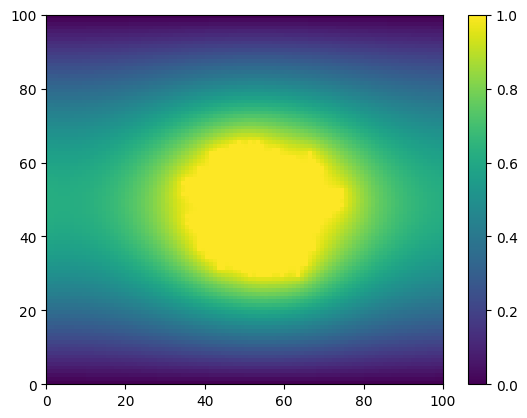

In [54]:
assignment_grid = np.zeros((100, 100), dtype="i")
assignment_grid[50,50] = 2
assignment_grid = fill_candidates(assignment_grid)
diffusion_grid, _ = sor(np.array(np.where(assignment_grid.copy() == 2, 1, 0), dtype='f'), assignment_grid, 1.7, 1e-5)
for _ in tqdm(range(1000)):
    start = time.perf_counter()
    assignment_grid, diffusion_grid = simulate_growth(assignment_grid, diffusion_grid, 15)
    growth = time.perf_counter()
    diffusion_grid, _ = sor(diffusion_grid, assignment_grid, 1.93, 1e-5)
    sor_t = time.perf_counter()
    assignment_grid= fill_candidates(assignment_grid)
    fill = time.perf_counter()
    # print(f"growth: {-1*(start - growth)}, sor: {-1*(growth - sor_t)}, fill: {-1*(sor_t - fill})")
plt.pcolormesh(diffusion_grid)
plt.colorbar()

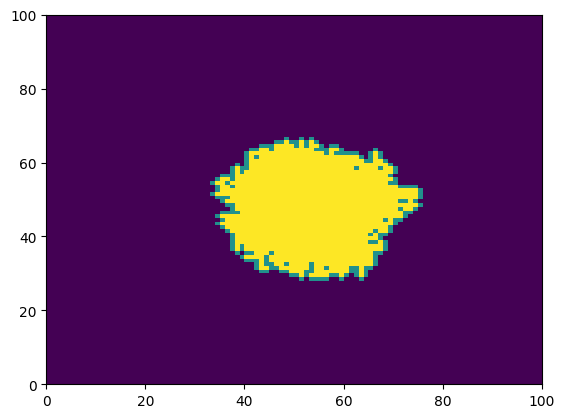

In [55]:
plt.pcolormesh(assignment_grid)